In [7]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
class NeuralNetwork:
    
    def __init__(self, learning_rate):
        #self.w = np.array([np.random.randn(), np.random.randn()])
        #self.w0 = np.random.randn()
        self.w = np.array([0, 0])
        self.w0 = 0
        self.learning_rate = learning_rate
        
    def _sigmoid(self, x):  #СИГМОИДА
        return 1 / (1 + np.exp(-x))
    
    def _sigmoid_deriv(self, x):  # Производная сигмоиды
        return self._sigmoid(x) * (1 - self._sigmoid(x))
    
    def predict(self, input_vector):  # Предсказание нейрона
        prediction = self._sigmoid(np.dot(input_vector, self.w) + self.w0)        
        return prediction
    
    def _compute_gradients(self, input_vector, target):
        
        prediction = self.predict(input_vector) # Предсказание сети

                 #   
                 #  target - эталон для сравнения (реальное значение)
                 # (prediction - target)**2  - находим (ошибку) разницу между предсказаным 
                 #  и эталонным значением, и минимизируем ошибку.
                 #  В минимуме производная равна нулю...
                 # 
                 # Найдём производную  суперпозиции функций
                 #  2*(prediction - target) производная КВАДРАТИЧНОЙ функции
                 #
                 # self._sigmoid(x) * (1 - self._sigmoid(x)) - производная СИГМОИДЫ
                 # 
                 # (x * w + w0) аргумент сигмоиды
                 # найдём производную АРГУМЕНТА сигмоиды
                 #
                 # Производная суперпозиции функций будет равна произведению 
                 # производной АРГУМЕНТА сигмоиды на производную СИГМОИДЫ 
                 # и на производную КВАДРАТИЧНОЙ функции
                 #
            # производная КВАДРАТИЧНОЙ функции
        deriv_quad_func = 2 * (prediction - target)
        
            # производная СИГМОИДЫ
        deriv_sigmoid = self._sigmoid_deriv(np.dot(input_vector, self.w) + self.w0)
        
            #  производная по w0
        deriv_w0 = 1
        
            #  производная по w
        deriv_w = (0 * self.w) + (1 * input_vector)
        
            # вычисляем градиент (частные производные)
        derror_w0 = (
            deriv_quad_func * deriv_sigmoid * deriv_w0
        )
        derror_w = (
            deriv_quad_func * deriv_sigmoid * deriv_w
        )
        return derror_w0, derror_w
    
    
        # Пересчёт весов
    def _update_parameters(self, derror_w0, derror_w):
        self.w0 = self.w0 - (derror_w0 * self.learning_rate)
        self.w = self.w - (
            derror_w * self.learning_rate
        )        
        
    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            
            # Случайно выбираем номер элемента в массиве входных данных
            # по которому будем осуществлять градиентный спуск на данной итерации
            random_data_index = np.random.randint(len(input_vectors))
            # по выбранному номеру получаем 
            input_vector = input_vectors[random_data_index]
            
            # получаем реальное значение для сравнения (эталон)
            target = targets[random_data_index]
            
            # Вычисляем градиент (частные производные)
            derror_w0, derror_w = self._compute_gradients(input_vector, target)
            
            # производим пересчёт весов
            self._update_parameters(derror_w0, derror_w)
            
            # Вычисляем совокупную ошибку каждые 100 итераций
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # В цикле проверяем прогоняем все входные данные
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]
                    
                    #  делаем предсказание на текущих данных
                    prediction = self.predict(data_point)
                    
                    # получаем квадратичное отклонение результата от эталона (ошибку)
                    error = np.square(prediction - target)   
                    
                    cumulative_error = cumulative_error + error
                    
                cumulative_errors.append(cumulative_error)
        return cumulative_errors

In [4]:
learning_rate = 0.01

input_vectors = np.array(
    [
        [3, 1.5],
        [2, 1],
        [4, 1.5],
        [3, 4],
        [3.5, 0.5],
        [2, 0.5],
        [5.5, 1],
        [1, 1],
        [1, 2],
        [1.2, 0.9]
    ]
)

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0])


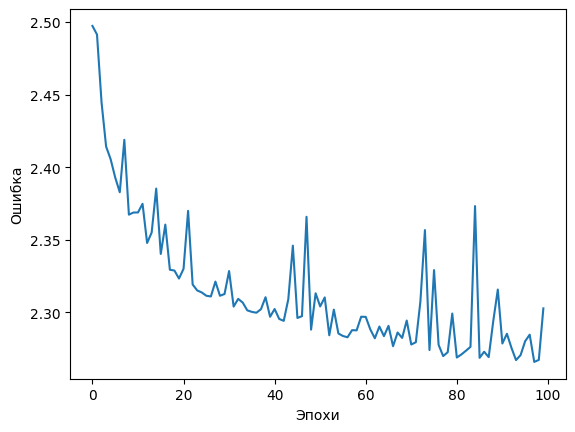

In [5]:
neural_network = NeuralNetwork(learning_rate)
training_error   =   neural_network.train(input_vectors,   targets,
10000)
plt.plot(training_error)
plt.xlabel("Эпохи")
plt.ylabel("Ошибка")
plt.show()


In [6]:
print(training_error)

[2.497324872154284, 2.491396096114884, 2.444602340764544, 2.4142434715648493, 2.4054689238649978, 2.392893624576028, 2.382765542278114, 2.418877452376152, 2.3673541987182016, 2.368802103353958, 2.368851246621513, 2.3748145084298766, 2.3478412361046512, 2.35500617384116, 2.385294175461392, 2.340287568502367, 2.36047734906487, 2.3293952643772933, 2.3288374642978176, 2.3233283508210065, 2.3300048555190522, 2.3699620414781504, 2.319222381960256, 2.315141263274571, 2.3137469888334983, 2.311495720239828, 2.310990031504328, 2.3212477342596265, 2.311478884587308, 2.312672694954839, 2.3284834314387366, 2.3040192839496374, 2.309347005301808, 2.3067565047440284, 2.3014160036337303, 2.3003794966244926, 2.2997885284361814, 2.3022402896984815, 2.310462322294224, 2.2970240527990673, 2.3023533044204996, 2.295516809084252, 2.29418848548137, 2.30906973270107, 2.3459986267080666, 2.2961774344986887, 2.297423072551938, 2.365872405353978, 2.2881456672602902, 2.3131840090683524, 2.3041378454371375, 2.310329